# <<<<<<<<<<<<<<<<< Modelos >>>>>>>>>>>>>>>>>>>>>>>

GENERAR ARCHIVOS DE TRAIN Y TEST

In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

train, test = train_test_split(df, test_size=0.33, shuffle=True) # Pronto llegará la 33

train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)

CREACIÓN DE X y de Y

In [258]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Visualizaciones", "Título del vídeo"], axis=1)
y = df["Visualizaciones"]

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=33)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(163, 10)
(331, 10)
(163,)
(331,)


Escalado de los datos

In [260]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
scal.fit(X_train) 
X_train_scal = scal.transform(X_train)
X_test_scal = scal.transform(X_test)

#Para revertirlo
#X_train = scal.inverse_transform(X_train)

# 1. Regresión Logística

Hands on Machine Learning: "Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result"

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

PREDICTORAS Y TARGET

In [262]:
X = train.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = train['Visualizaciones']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

FIT

In [264]:
logr = LogisticRegression()

logr.fit(X_train, y_train)

C:\Users\Braulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicciones

In [265]:
pred_logr = logr.predict(X_test)

EVALUACIÓN

In [266]:
print("MAE:", mean_absolute_error(y_test, pred_logr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_logr))) 

MAE: 328.1743119266055
RMSE: 915.3972366778431


GUARDAR EL MODELO

In [267]:
import pickle
with open('../models/modelo_LogR.pkl', 'wb') as archivo:
    pickle.dump(logr, archivo)

# 2. Random Forest Regressor

Hands on Machine Learning : "Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further"

In [268]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [269]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [270]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

PARÁMETROS Y GRIDSEARCHCV con Cross Validation

In [272]:
""" model = RandomForestRegressor(n_estimators=100, random_state=33)

parameters = {"max_depth":[1,2,3,4,5,6,7],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2, 4, 8],
              "min_samples_leaf": [1, 2, 3, 4],
              "max_features": [2,3,4,5]
}

rfr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error", n_jobs= -1) """

' model = RandomForestRegressor(n_estimators=100, random_state=33)\n\nparameters = {"max_depth":[1,2,3,4,5,6,7],\n              "criterion": [\'squared_error\', \'absolute_error\'],\n              "min_samples_split": [2, 4, 8],\n              "min_samples_leaf": [1, 2, 3, 4],\n              "max_features": [2,3,4,5]\n}\n\nrfr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error", n_jobs= -1) '

FIT

In [273]:
""" rfr_gs.fit(X_train, y_train) """

' rfr_gs.fit(X_train, y_train) '

Mejores parámetros

In [274]:
""" rfr_gs.best_params_ """

' rfr_gs.best_params_ '

Mejor modelo Random Forest Regressor

In [275]:
mejor_modelo = RandomForestRegressor(
    criterion= 'absolute_error',
    max_depth=3,
    max_features=5,
    min_samples_leaf=2,
    min_samples_split=8)

Fit y predict del mejor modelo

In [276]:
mejor_modelo.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=3, max_features=5,
                      min_samples_leaf=2, min_samples_split=8)

In [277]:
y_pred = mejor_modelo.predict(X_test)

Visualización del mejor modelo

In [278]:
""" plt.figure(figsize=(15, 10))
plot_tree(mejor_modelo.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.show() """

' plt.figure(figsize=(15, 10))\nplot_tree(mejor_modelo.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=12)\nplt.show() '

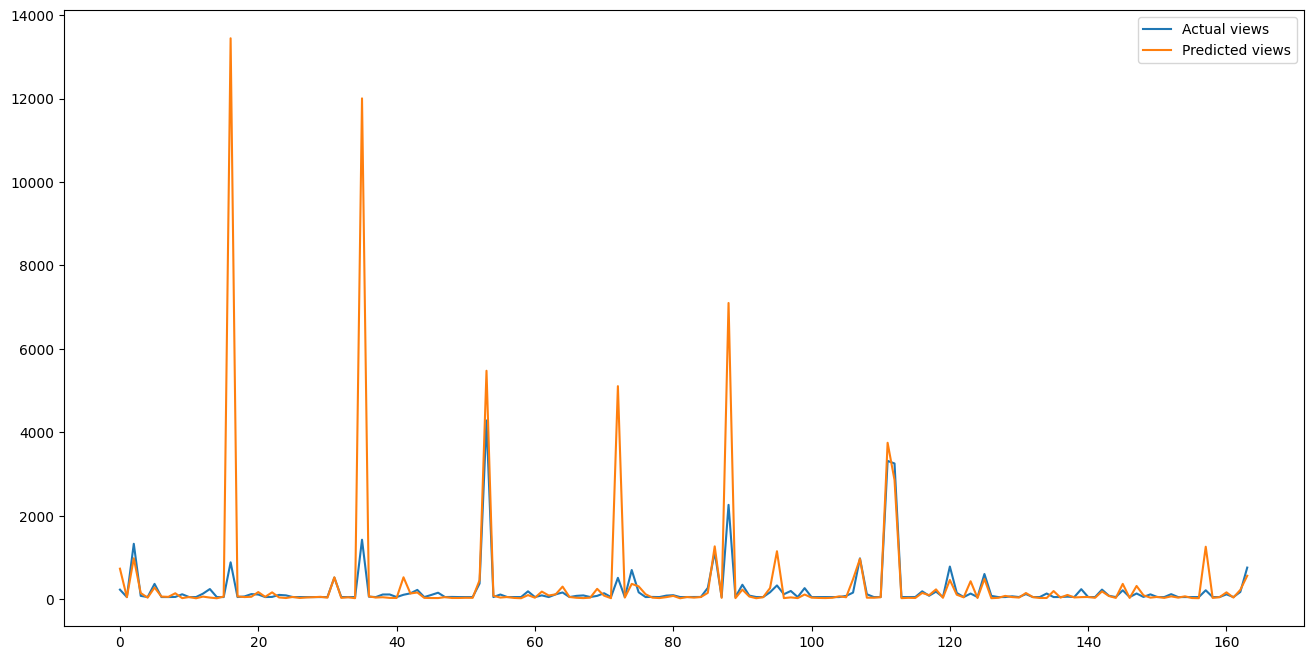

In [279]:
test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)

plt.plot(test[:400])
plt.legend(['Actual views','Predicted views'])

Evaluación del modelo

In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

MAE: 277.24896341463415
MSE: 1945792.8721814025
RMSE: 1394.9167975837852


In [282]:
""" test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})
test """

,Predicted views,Actual views
52,231.635,734
311,54.025,51
44,1330.570,985
159,82.540,151
362,54.025,40
...,...,...
305,54.395,52
149,119.400,167
349,54.025,42
125,176.030,226


Guardar el modelo

In [ ]:
import pickle
with open('../models/modelo_RFR.pkl', 'wb') as archivo:
    pickle.dump(mejor_modelo, archivo)

YAML porque es el mejor modelo

In [ ]:
import yaml
with open('../models/modelo_config_def.yaml', 'w') as c:
    yaml.dump(mejor_modelo, c)

# 3. Decision Tree Regressor

Hands On Machine Learning: "This is a powerful model, capable of finding complex nonlinear relationships in the data"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
#OJO QUE AQUI EMPIEZO CON TODOS LOS DATOS (data =) NO CON train =

df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers
df['Visualizaciones'] = df.Visualizaciones
#data.head()

GRAFICO PARA VER LA CORRELACION DE LAS VARIABLES

In [ ]:
plt.figure(figsize=(17,7))
bars = df.corr()['Visualizaciones'].sort_values(ascending=False).plot(kind='bar')

SLIPT DE TEST Y DATA

In [ ]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

DECISION TREE CON SUS PARÁMETROS

In [ ]:
param_grid = {
    'max_depth': [None, 2, 3, 4]
}

dt_model = GridSearchCV(
    DecisionTreeRegressor(random_state=33),
    cv=10,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

Fit del modelo

In [ ]:
dt_model.fit(X_train, y_train)

In [ ]:
y_pred = dt_model.predict(X_test)

Evaluación

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

AÑADIR UNA NUEVA FEATURE USANDO EL DECISION TREE COMBINANDO LAS 3 VARIABLES MÁS CORRELADAS

In [ ]:
""" corr = df.corr().abs() #para sacar las correlaciones en valores absolutos
corr_visual = corr.loc[:,['Visualizaciones']] #para sacar las correlaciones de 'Visualizaciones'
corr_visual.sort_values(ascending=False, by = 'Visualizaciones') #en orden """

Variables en una lista y RE-FIT del modelo mejorado

In [ ]:
features_selecc = ['Visualizaciones necesarias para suscribirse al canal', 'Porcentaje de clics de las impresiones (%)', 'Visualizaciones necesarias para compartir el video'] #seleccionar las 3 mejores

dt_model.fit(X_train[features_selecc], y_train)

Predict del modelo de las 3 variables

In [ ]:
y_pred_3 = dt_model.predict(X_test[features_selecc])

Ha mejorado un poco:

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_3))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))

Visualización

In [ ]:
test = pd.DataFrame({'Predicted views':y_pred_3, 'Actual views':y_test})
fig= plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)

plt.plot(test[:100])
plt.legend(['Actual views','Predicted views'])

In [ ]:
import pickle
with open('../models/modelo_DT.pkl', 'wb') as archivo:
    pickle.dump(dt_model, archivo)

# 4. Linear Regression

Hands On Machine Learning: "The simplest and most commonly used."

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [ ]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Escalado

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

Predicts

In [ ]:
y_pred = lr_model.predict(X_test)

Visualización

In [ ]:
test = pd.DataFrame({'Predicted VIEWS':y_pred, 'Actual VIEWS':y_test})
fig= plt.figure(figsize=(16,8))

test = test.reset_index()
test = test.drop(['index'],axis=1)

plt.plot(test[:50])
plt.legend(['Actual VIEWS','Predicted VIEWS'])

Evaluación

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

Guardar modelo

In [ ]:
import pickle
with open('../models/modelo_LinR.pkl', 'wb') as archivo:
    pickle.dump(lr_model, archivo)

# 5. XGBRegressor Con GridSearchCV

Hands On Machine Learning: "It is worth noting that an optimized implementation of Gradient Boosting is available
in the popular python library XGBoost, which stands for Extreme Gradient Boosting."

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [ ]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Escalado

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)

Predict

In [ ]:
y_pred = model.predict(X_test)

Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

Visualización

In [ ]:
""" test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual views','Predicted views']) """

In [ ]:
model.get_params() #para ver que parametros tiene

En la celda de abajo se hizo el GridSearchCV, ahora comentado.

In [ ]:
""" param_grid = dict(
    n_jobs=[-1],
    learning_rate=[0.1, 0.2, 0.3],
    objective=['reg:squarederror'],
    max_depth=[3, 5, 7], 
    n_estimators=[100, 125, 140],
    subsample=[0.2, 0.4, 0.7, 0.9],
    gamma=[0.05, 0.1, 0.15],
    scale_pos_weight=[0, 1],
    reg_alpha=[0, 0.5],
    reg_lambda=[1, 0],
)

model = XGBRegressor(random_state=33, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(X_train, y_train)
print('Mejores parametros:', best_model.best_params_) """

FIT DE LOS MEJORES PARÁMETROS DEL MODELO

In [ ]:
regressor = XGBRegressor(
    gamma=0.05,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=125,
    objective='reg:squarederror',
    subsample=0.2,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1
)
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

Visualización del modelo mejorado

In [ ]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual value','Predicted value'])

Evaluación del modelo *[Mejora poco]*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

Guardar modelo

In [ ]:
import pickle
with open('../models/modelo_XGB.pkl', 'wb') as archivo:
    pickle.dump(model, archivo)

YAML puesto que es el mejor modelo:

In [ ]:
import yaml
with open('../models/modelo_config_def.yaml', 'w') as c:
    yaml.dump(model, c)

# EXTRA. TEST para sacar el MEJOR Modelo e intentar mejorarlo

In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

CARGAMOS EL DATA

In [ ]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [ ]:
#df['Visualizaciones']

Train y test

In [ ]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Escalado de los datos

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SELECCIÓN DE ENTRE TODOS LOS MODELOS DE REGRESIÓN

In [ ]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv', 'mae'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores))),
           'mae': round(mean_absolute_error(y_test, y_pred))
    }

    df_models = df_models.append(row, ignore_index=True)

Abajo se ven ordenados los resultados del dataframe df_models en función de la puntuación MAE obtenida de todos los modelos de regresión.

El modelo RandomForestRegressor llega a MAE de 303, peor que lo que he conseguido yo con RandomForestRegressor de 283.

In [ ]:
df_models.head(10).sort_values(by='mae', ascending=True)

In [ ]:
regressor = RandomForestRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mejorar los hiperparámetros del modelo:

Para ajustar el modelo RandomForestRegressor() (o cualquier modelo), hay que mirar qué hiperparámetros están disponibles para ajustar con el model.get_params().

In [ ]:
model.get_params()

Hay que seleccionar algunos de los hiperparámetros y agregarlos a un dict() y asignándolos a param_grid. Luego se ejecuta la función GridSearchCV para probar cada combinación única de hiperparámetros y así encontrar los hiperparámetros óptimos del modelo. (Ahora está comentado porque ya se pensó el mejor modelo con esos parámetros)

In [ ]:
param_grid = dict(
max_depth =[None,1,2,3,4,5],
criterion= ['squared_error', 'absolute_error'],
min_samples_split= [1, 2, 3, 4],
min_samples_leaf= [1, 2, 3, 4],
max_features= [1,2,3,4,5])

model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(X_train, y_train)
print('Best parameters:', best_model.best_params_)

FIT y EVALUACIÓN del mejor modelo elegido

In [ ]:
regressor = RandomForestRegressor(
criterion= 'squared_error',
max_depth=4,
max_features=3,
min_samples_leaf=2,
min_samples_split=2)

model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test, y_pred))))
print('RMSE_CV:',round(np.mean(np.sqrt(-scores)))) 

ME DA PEOR.

# 6. PCA. Modelo No Supervisado.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

In [ ]:
X = train.drop(columns=['Visualizaciones', 'Título del vídeo'])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,10)))
plt.xlabel('Number of PCs')
plt.ylabel("Cumulative explained variance ratio");

Visualización:

In [ ]:
plt.figure(figsize=(25, 35))
plt.matshow(pca.components_[:9], cmap='seismic')
plt.yticks([0,1,2,3,4,5,6,7,8],['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9'])
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.colorbar()
plt.show()

In [ ]:
pd.DataFrame(pca.components_[:9], columns=X.columns, index=['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7','PC8', 'PC9'])

In [ ]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', XGBRegressor())
])
pipe

In [ ]:
params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7],
    'classifier__max_depth': np.arange(3,7),
}

gs = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
gs.fit(X_train, y_train)

Predict

In [ ]:
y_pred = gs.predict(X_test)

Valoración (Da mejor MAE que con el XGBRegressor solo)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Guardar último modelo

In [ ]:
import pickle
with open('../models/modelo_PCA.pkl', 'wb') as archivo:
    pickle.dump(gs, archivo)